# Circuit of Grover's search using Cirq

This notebook will teach you how to construct your own circuits for the Grover's search using Cirq.

# Install Cirq

Install Cirq if you haven't.

In [ ]:
!pip install --quiet cirq

     |████████████████████████████████| 1.5MB 7.7MB/s 
     |████████████████████████████████| 389kB 28.8MB/s 
     |████████████████████████████████| 1.3MB 35.9MB/s 


# Importing Packages

In [ ]:
import cirq # No need to explain why
from cirq.contrib.svg import SVGCircuit # Required to display some fancy circuits

#The circuits

Now, we move on to main part of the notebook. In this section, we shall explain the construction of circuits for Grover's search in a $2$-qubit (4 element database) and a $3$-qubit (8 element database). The search problem can be stated as follows: Let $f: \{0, 1, \dots, N-1 \} \rightarrow \{ 0, 1\}$. Our objective is to find an element in the domain $\omega$, such that $f(\omega) = 1$, using minimum calls to the function $f$. The problem is carried out in a quantum setting by the circuit

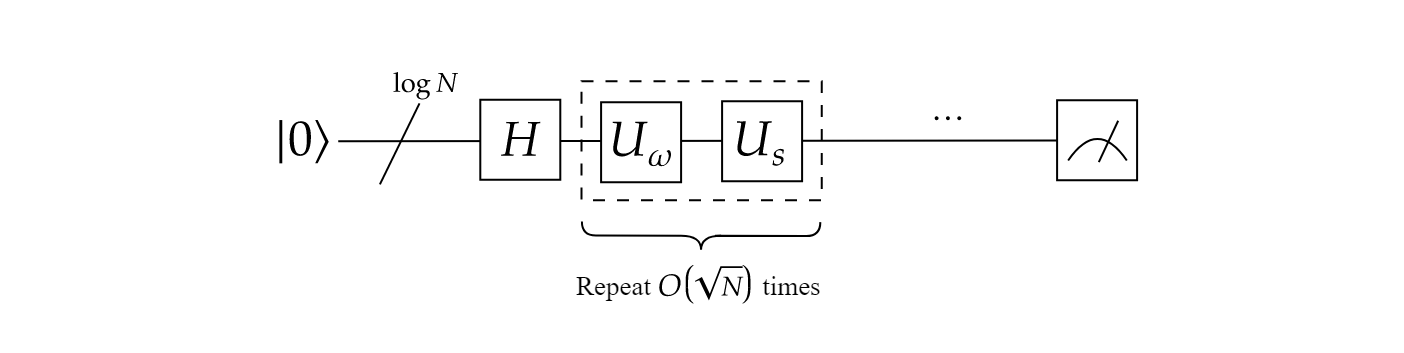

Here, 

\begin{equation}
    U_{\omega}|i\rangle=
    \begin{cases}
      |i\rangle & \text{ if }i \neq \omega \\
      -|i\rangle & \text{ if }i = \omega
    \end{cases}
\end{equation}

\begin{equation}
  U_s = 2|+\rangle^{\otimes\log N} \langle+|^{\otimes\log N} - I_N
\end{equation}

#Case $N = 4$

In this section, we explain the construction and simulation of Grover's search for a boolean function defined on $4$ elements. This would require $\log 4=2$ qubits. The function we are interested in is $f:\{ 0,1,2,3\} \rightarrow \{ 0,1\}$

\begin{equation}
  f(x) = 
  \begin{cases}
    1 & \text{ if } x = 3 \\
    0 & \text{ if }  x \neq 3
  \end{cases}
\end{equation}
In this case, $U_{\omega}$ should be an operator defined as
\begin{equation}
  U_{\omega}|x_1 x_2\rangle = 
  \begin{cases}
    -|x_1 x_2\rangle & \text{ if } x_1 = 1 \ \& \ x_2 = 1 \\
    |x_1 x_2\rangle & \text{ otherwise }
  \end{cases}
\end{equation}

Then in matrix form, $U_{\omega}$ is
\begin{equation}
  U_{\omega}=
  \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & -1 
  \end{bmatrix}
\end{equation}

This is the controlled-$Z$ gate.


One can see that the operator $U_s$ does not depend on the function $f$ and it depends only on $N$. When $N=4$ ($2$-qubit case), the circuit for $U_s$ can be seen as

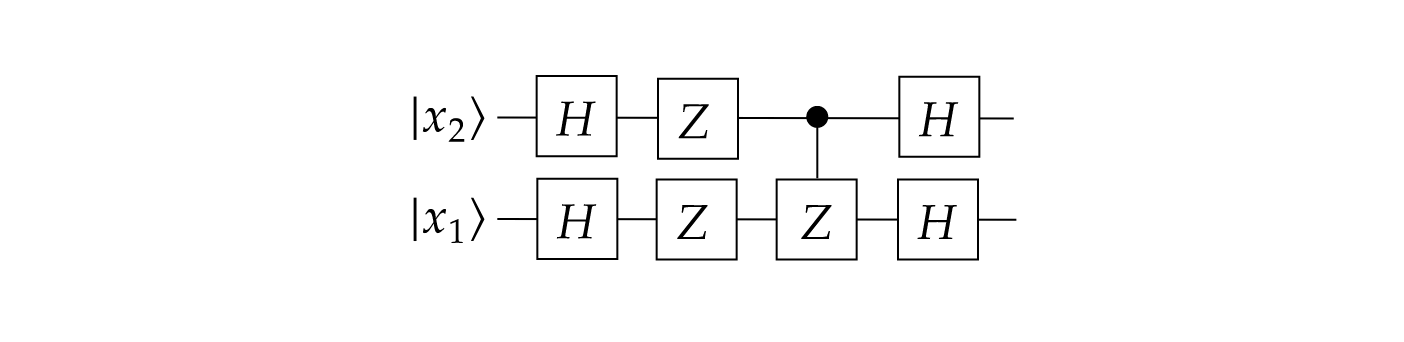

Note that if the domain is $4$ and their is only one satisfiable element in the domain, then a single iteration of $U_{\omega}$ and $U_{s}$ gives the answer $\omega$ as output with $100 \%$ probability. Then, the whole circuit can be seen as 

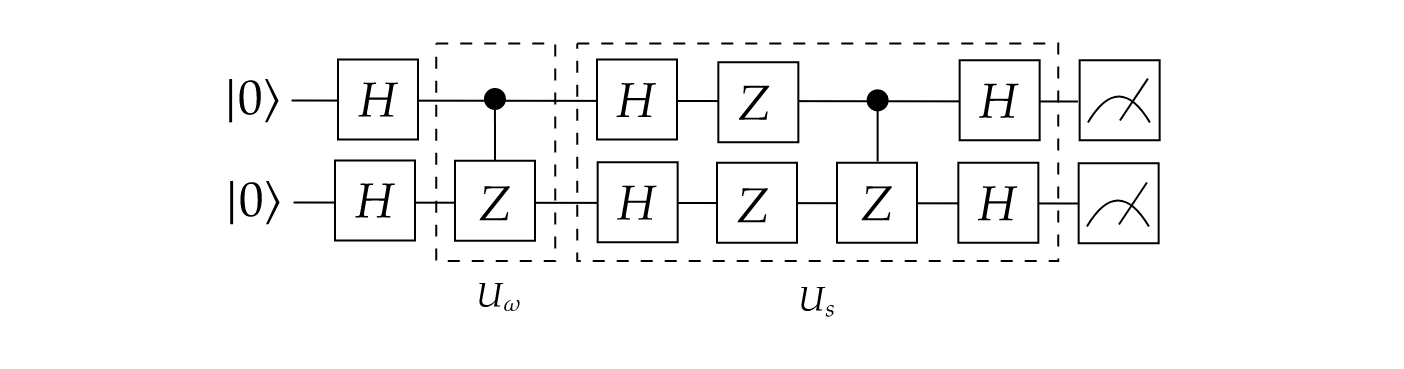

Now, we move on to constructing this circuit using Cirq.

First we initialze a circuit.

In [ ]:
# Prepare circuit 
circuit = cirq.Circuit()

The next step is to initialize the qubits. For this circuit, we require $2$ qubits. 

In [ ]:
# Prepare qubits
q0, q1 = cirq.LineQubit.range(2)

Now, we shall start applying the gates.

We start with applying Hadamrd gates to all qubits.

In [ ]:
# Apply Hadamard gate on qubits 0,1
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))

Next step is to apply $U_{\omega}$

In [ ]:
# Apply CZ gate
circuit.append(cirq.CZ(q0, q1))

Let's take a break and look at the circuit we have built so far.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


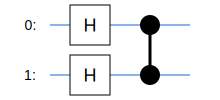

In [ ]:
# Display circuit
SVGCircuit(circuit)

Looks good. Now we shall apply $U_s$.

In [ ]:
# Apply U_s
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))

circuit.append(cirq.Z(q0))
circuit.append(cirq.Z(q1))

circuit.append(cirq.CZ(q0, q1))

circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))

Let's take a look at the circuit again.

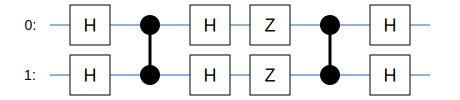

In [ ]:
# Display circuit
SVGCircuit(circuit)

Looks better. Now, we shall measure and simulate the circuit $100$ times.

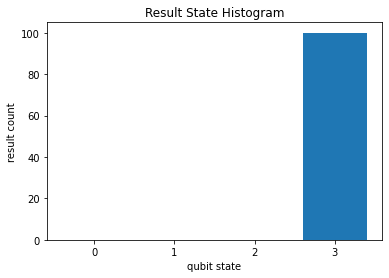

In [ ]:
# Measure
s=cirq.Simulator()
results=s.simulate(circuit, qubit_order = [q0, q1])
circuit.append(cirq.measure(*list(reversed([q0, q1])), key='result'))
samples=s.run(circuit, repetitions=100)

# Plot the results
cirq.vis.plot_state_histogram(samples)

We see that the result in always $11$. The final circuit is

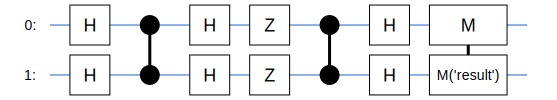

In [ ]:
# Display circuit
SVGCircuit(circuit)

#Case $N = 8$

In this section, we explain the construction and simulation of Grover's search for a boolean function defined on $8$ elements. This would require $\log 8=3$ qubits. The function we are interested in is $f:\{ 0,1, \dots, 7\} \rightarrow \{ 0,1\}$

\begin{equation}
  f(x) = 
  \begin{cases}
    1 & \text{ if } x = 5 \ \& \ x = 6 \\
    0 & \text{ otherwise } 
  \end{cases}
\end{equation}
In this case, $U_{\omega}$ should be an operator defined as
\begin{equation}
  U_{\omega}|x_1 x_2 x_3\rangle = 
  \begin{cases}
    -|x_1 x_2 x_3\rangle & \text{ if } x_1 x_2 x_3 = 101 \ \& \ x_1 x_2 x_3 = 110 \\
    |x_1 x_2 x_3\rangle & \text{ otherwise }
  \end{cases}
\end{equation}



The operator $U_{\omega}$ can be constructed as

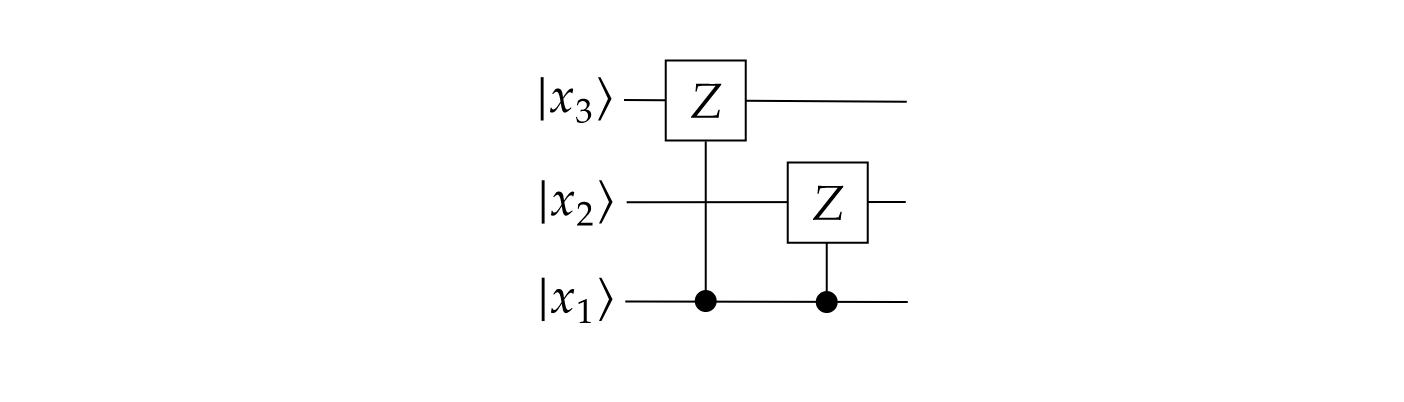

When $N=8$ ($3$-qubit case), the circuit for $U_s$ is

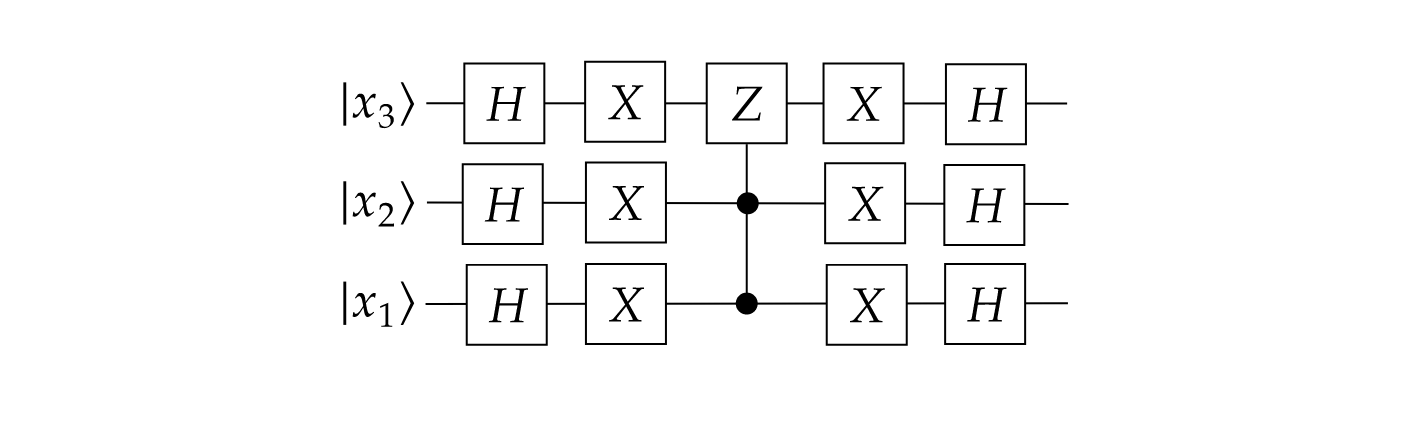

Here also, since the domain has $8$ elements and there are $2$ satisfiable solutions, only one iteration of $U_{\omega}$ and $U_{s}$ is required to obtain one of the solutions with $100 \%$ probability. The final circuit can then be viewed as 

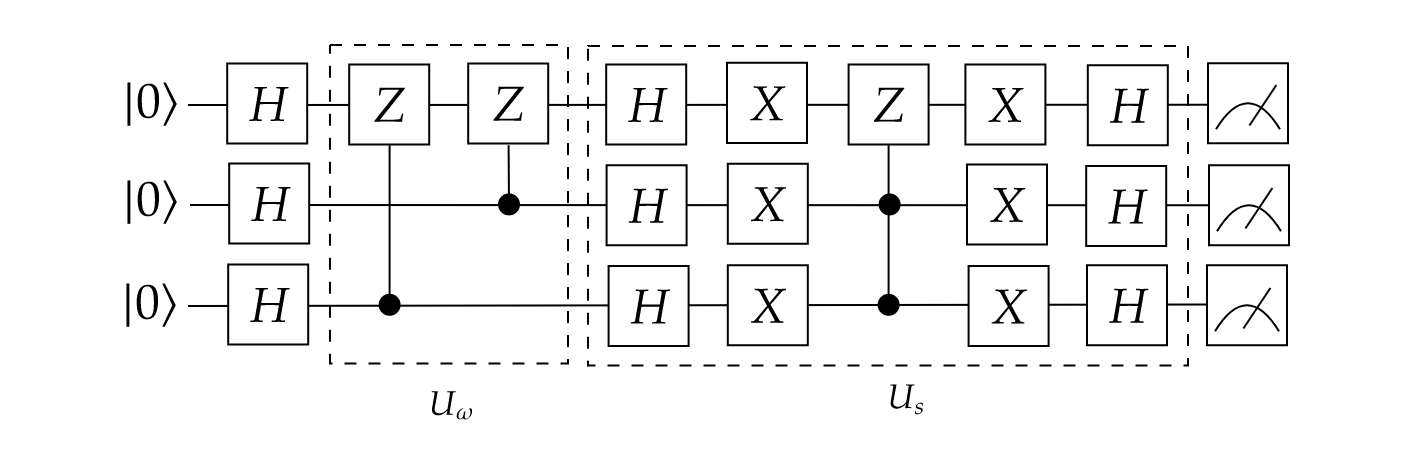

Since constructing and executing the previous circuit was explained in detail, we are not going to explain the construction of this circuit extensively as it is extremely similar to the previous circuit. 

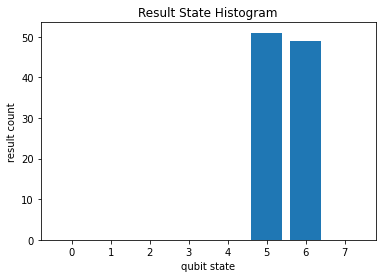

In [ ]:
# Prepare circuit 
circuit = cirq.Circuit()

# Prepare qubits
q0, q1, q2 = cirq.LineQubit.range(3)

# Apply Hadamard gate on qubits 0,1
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))

# Apply U_w
circuit.append(cirq.CZ(q2, q0))
circuit.append(cirq.CZ(q1, q0))

# Apply U_s
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))

circuit.append(cirq.X(q0))
circuit.append(cirq.X(q1))
circuit.append(cirq.X(q2))

circuit.append(cirq.CCZ(q2, q1, q0))

circuit.append(cirq.X(q0))
circuit.append(cirq.X(q1))
circuit.append(cirq.X(q2))

circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))

# Measure
s=cirq.Simulator()
results=s.simulate(circuit, qubit_order = [q0, q1, q2])
circuit.append(cirq.measure(*[q0, q1, q2], key='result'))
samples=s.run(circuit, repetitions=100)

# Plot the results
cirq.vis.plot_state_histogram(samples)

We see that all measurements resulted in one of the $2$ solutions. The circuit can be seen as

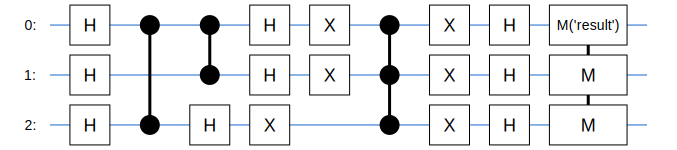

In [ ]:
# Display circuit
SVGCircuit(circuit)

So far, we have been dealing with cases where the circuit would result in a solution with $100 \%$ probability. In this section, we shall consider a function where the success probability is not $100 \%$. Consider the function $f: \{ 0, 1, \dots, 7\} \rightarrow \{ 0,1\}$ where
\begin{equation}
  f(x) = 
  \begin{cases}
    1 & \text{ if } x = 7 \\
    0 & \text{ otherwise } 
  \end{cases}
\end{equation}

In this case, $U_{\omega}$ should be an operator defined as
\begin{equation}
  U_{\omega}|x_1 x_2 x_3\rangle = 
  \begin{cases}
    -|x_1 x_2 x_3\rangle & \text{ if } x_1 x_2 x_3 = 111 \\
    |x_1 x_2 x_3\rangle & \text{ otherwise }
  \end{cases}
\end{equation}

This means that $U_{\omega}$ is the controled-controlled-$Z$ (CCZ) gate. The same $U_s$ gate we used in the previous case can be used here also.


First, we shall apply $U_{\omega}$ and $U_s$ once and observe the result.

Counter({7: 79, 6: 7, 5: 3, 4: 3, 3: 2, 0: 2, 1: 2, 2: 2})


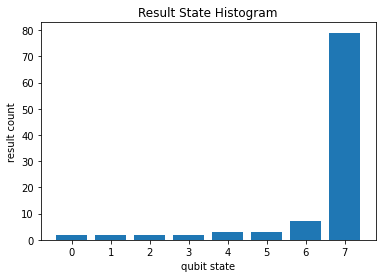

In [ ]:
# Prepare circuit 
circuit = cirq.Circuit()

# Prepare qubits
q0, q1, q2 = cirq.LineQubit.range(3)

# Apply Hadamard gate on qubits 0,1
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))

# Apply U_w
circuit.append(cirq.CCZ(q0, q1, q2))

# Apply U_s
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))

circuit.append(cirq.X(q0))
circuit.append(cirq.X(q1))
circuit.append(cirq.X(q2))

circuit.append(cirq.CCZ(q2, q1, q0))

circuit.append(cirq.X(q0))
circuit.append(cirq.X(q1))
circuit.append(cirq.X(q2))

circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))

# Measure
s=cirq.Simulator()
results=s.simulate(circuit, qubit_order = [q0, q1, q2])
circuit.append(cirq.measure(*[q0, q1, q2], key='result'))
samples=s.run(circuit, repetitions=100)

# Print results
print(samples.histogram(key = 'result'))

# Plot the results
cirq.vis.plot_state_histogram(samples)

We see that the correct answer $111$ occurs around $79 \%$. Before we move on to the next case, we'll take a look at the circuit, becuase we can

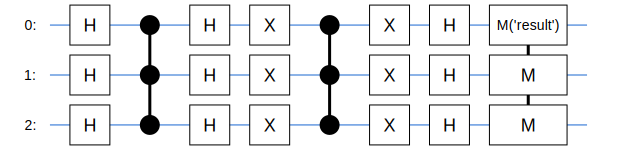

In [ ]:
# Display circuit
SVGCircuit(circuit)

Ok. In the next case, we shall run $U_{\omega}$ and $U_{s}$ twice and observe the result.

Counter({7: 97, 2: 1, 4: 1, 1: 1})


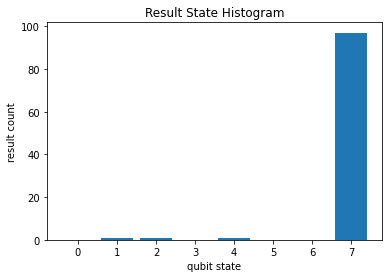

In [ ]:
# Prepare circuit 
circuit = cirq.Circuit()

# Prepare qubits
q0, q1, q2 = cirq.LineQubit.range(3)

# Apply Hadamard gate on qubits 0,1
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))

for i in range(2):
  # Apply U_w
  circuit.append(cirq.CCZ(q0, q1, q2))

  # Apply U_s
  circuit.append(cirq.H(q0))
  circuit.append(cirq.H(q1))
  circuit.append(cirq.H(q2))

  circuit.append(cirq.X(q0))
  circuit.append(cirq.X(q1))
  circuit.append(cirq.X(q2))

  circuit.append(cirq.CCZ(q2, q1, q0))

  circuit.append(cirq.X(q0))
  circuit.append(cirq.X(q1))
  circuit.append(cirq.X(q2))

  circuit.append(cirq.H(q0))
  circuit.append(cirq.H(q1))
  circuit.append(cirq.H(q2))

# Measure
s=cirq.Simulator()
results=s.simulate(circuit, qubit_order = [q0, q1, q2])
circuit.append(cirq.measure(*[q0, q1, q2], key='result'))
samples=s.run(circuit, repetitions=100)

# Print results
print(samples.histogram(key = 'result'))

# Plot the results
cirq.vis.plot_state_histogram(samples)

We see that the correct answer $111$ occurs around $97 \%$ this time. So, the probability of the right answer increases. Again, before we move on to the next case, we'll take a look at the circuit, becuase, again, we can

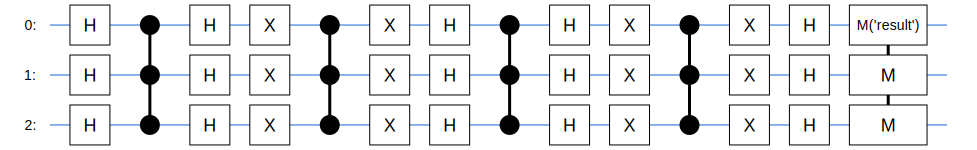

In [ ]:
# Display circuit
SVGCircuit(circuit)

Ok. In the next case, we shall run $U_{\omega}$ and $U_{s}$ thrice and observe the result. 

Counter({7: 36, 2: 13, 0: 12, 4: 11, 6: 8, 5: 8, 3: 6, 1: 6})


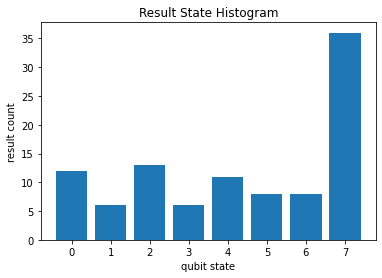

In [ ]:
# Prepare circuit 
circuit = cirq.Circuit()

# Prepare qubits
q0, q1, q2 = cirq.LineQubit.range(3)

# Apply Hadamard gate on qubits 0,1
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))

for i in range(3):
  # Apply U_w
  circuit.append(cirq.CCZ(q0, q1, q2))

  # Apply U_s
  circuit.append(cirq.H(q0))
  circuit.append(cirq.H(q1))
  circuit.append(cirq.H(q2))

  circuit.append(cirq.X(q0))
  circuit.append(cirq.X(q1))
  circuit.append(cirq.X(q2))

  circuit.append(cirq.CCZ(q2, q1, q0))

  circuit.append(cirq.X(q0))
  circuit.append(cirq.X(q1))
  circuit.append(cirq.X(q2))

  circuit.append(cirq.H(q0))
  circuit.append(cirq.H(q1))
  circuit.append(cirq.H(q2))

# Measure
s=cirq.Simulator()
results=s.simulate(circuit, qubit_order = [q0, q1, q2])
circuit.append(cirq.measure(*[q0, q1, q2], key='result'))
samples=s.run(circuit, repetitions=100)

# Print results
print(samples.histogram(key = 'result'))

# Plot the results
cirq.vis.plot_state_histogram(samples)

Interestingly, we see that the correct answer $111$ occurs only around $36 \%$ this time. So, the probability of the right answer has decreased now, which means we have probably started overcooking the circuit. The circuit now looks like this

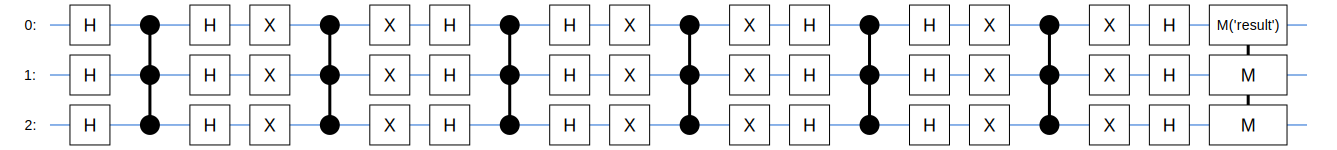

In [ ]:
# Display circuit
SVGCircuit(circuit)

In the last case, we shall run $U_{\omega}$ and $U_{s}$ four times and observe the result. 

Counter({3: 16, 0: 16, 4: 16, 1: 15, 2: 13, 5: 12, 6: 9, 7: 3})


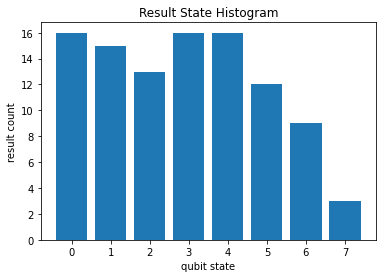

In [ ]:
# Prepare circuit 
circuit = cirq.Circuit()

# Prepare qubits
q0, q1, q2 = cirq.LineQubit.range(3)

# Apply Hadamard gate on qubits 0,1
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))

for i in range(4):
  # Apply U_w
  circuit.append(cirq.CCZ(q0, q1, q2))

  # Apply U_s
  circuit.append(cirq.H(q0))
  circuit.append(cirq.H(q1))
  circuit.append(cirq.H(q2))

  circuit.append(cirq.X(q0))
  circuit.append(cirq.X(q1))
  circuit.append(cirq.X(q2))

  circuit.append(cirq.CCZ(q2, q1, q0))

  circuit.append(cirq.X(q0))
  circuit.append(cirq.X(q1))
  circuit.append(cirq.X(q2))

  circuit.append(cirq.H(q0))
  circuit.append(cirq.H(q1))
  circuit.append(cirq.H(q2))

# Measure
s=cirq.Simulator()
results=s.simulate(circuit, qubit_order = [q0, q1, q2])
circuit.append(cirq.measure(*[q0, q1, q2], key='result'))
samples=s.run(circuit, repetitions=100)

# Print results
print(samples.histogram(key = 'result'))

# Plot the results
cirq.vis.plot_state_histogram(samples)

Now, we see that the correct answer $111$ only occured $3 \%$. So, we have probably extremely overcooked the circuit. The circuit now looks like this

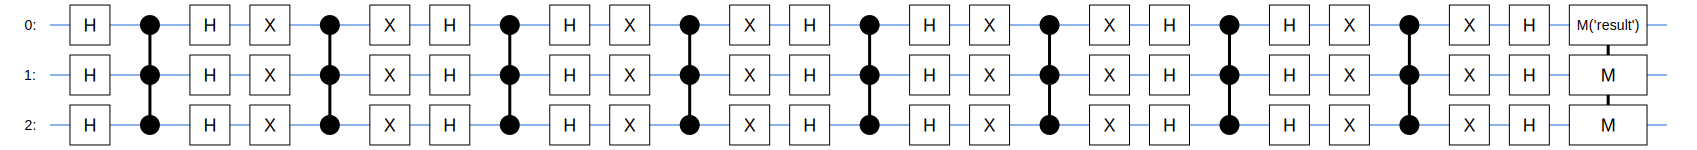

In [ ]:
# Display circuit
SVGCircuit(circuit)